# Trabalho final AED
## Dados venda jogos 1980 - 2020

### Discentes:
#### Bruno Reis Nakamura
#### Igor Jordany Richtic Silva
#### Victor Hugo Maranholi

In [90]:
import pandas as pd #importando a biblioteca Pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

game_sales_df = pd.read_csv('./datas/vgsales.csv', delimiter=',')

game_sales_df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Informação das colunas

Colum \
Rank - Ranque ordenado de mais vendas totais \
Name - nome do jogo \
plataform - plataforma que jogo roda \
Year - ano de lançamento \
Genre - genero do jogo \
publisher - empresa que publicou publisher \
NA_Sales - total de cópias vendidas na America do norte \
EU_Sales - total de cópias vendidas na Europa \
JP_sales - total de cópias vendidas no Japão \
Other_Sales - total de cópias vendidas no resto do mundo \
Global_Sales - nota do site vgchartz.com 

In [91]:
game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Base contém dados de 1980 - 2020

In [92]:
game_sales_df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

Contagem dos campos vazios

In [93]:
game_sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Substitui vazios da coluna Publisher por "noPublisher"

In [95]:
game_sales_df = game_sales_df.fillna({'Publisher': "noPublisher"})
game_sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Remover as linhas que contenham Ano vazio, poís a tabela veio ordenada por rank de maiores vendar, logo não é possível inferir um ano anterior ou sucessor para atribuir.

In [97]:
game_sales_df = game_sales_df.dropna()
game_sales_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Total de gêneros vendidos (em milhões)

<Axes: xlabel='Genre', ylabel='Sales'>

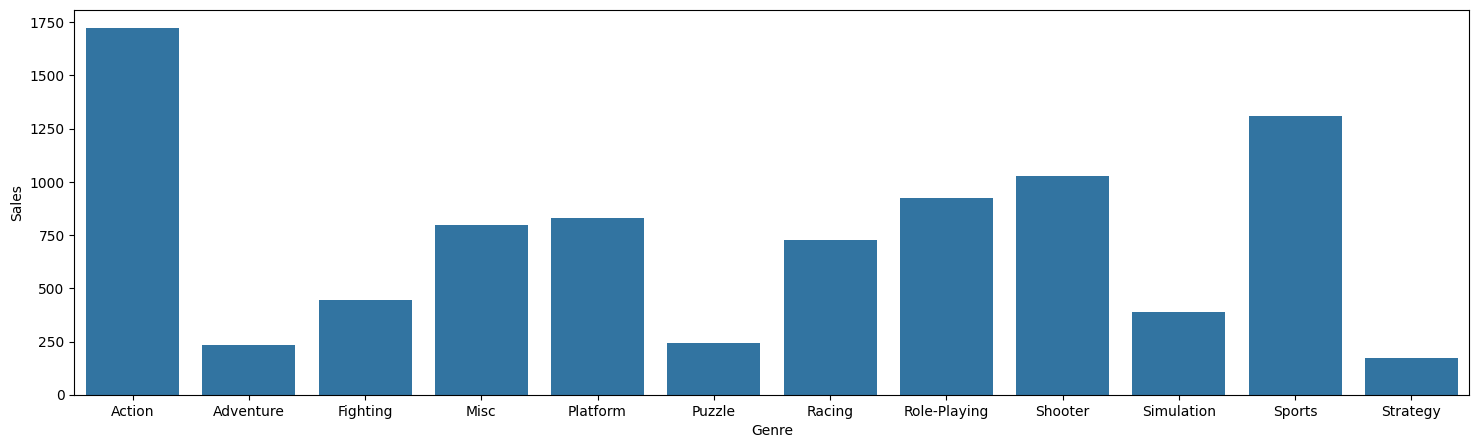

In [98]:
genre_global_sales = pd.DataFrame({'Sales' : game_sales_df.groupby("Genre")['Global_Sales'].sum()}).reset_index()
plt.subplots(figsize=(18,5))
sns.barplot(x='Genre',y='Sales', data=genre_global_sales)

Jogo mais verdido por gênero e região

In [99]:
genre_global_sales_region = pd.DataFrame({
    'NA_Sales': game_sales_df.groupby("Genre")['NA_Sales'].sum(),
    'EU_Sales': game_sales_df.groupby("Genre")['EU_Sales'].sum(),
    'JP_Sales': game_sales_df.groupby("Genre")['JP_Sales'].sum(),
    'Other_Sales': game_sales_df.groupby("Genre")['Other_Sales'].sum(),
    # 'Total_Sales' : game_sales_df.groupby("Genre")['Global_Sales'].sum()
    }).reset_index()
genre_global_sales_region

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,861.80,516.48,158.66,184.92
1,Adventure,102.06,63.79,52.01,16.70
2,Fighting,220.74,100.00,87.15,36.19
3,Misc,402.48,213.82,106.67,74.02
4,Platform,445.99,200.67,130.65,51.51
5,Puzzle,122.01,50.53,56.68,12.47
6,Racing,356.93,236.32,56.61,76.68
7,Role-Playing,326.50,187.58,350.29,59.38
8,Shooter,575.16,310.45,38.18,101.90
9,Simulation,181.78,113.20,63.54,31.36


<Axes: xlabel='Genre'>

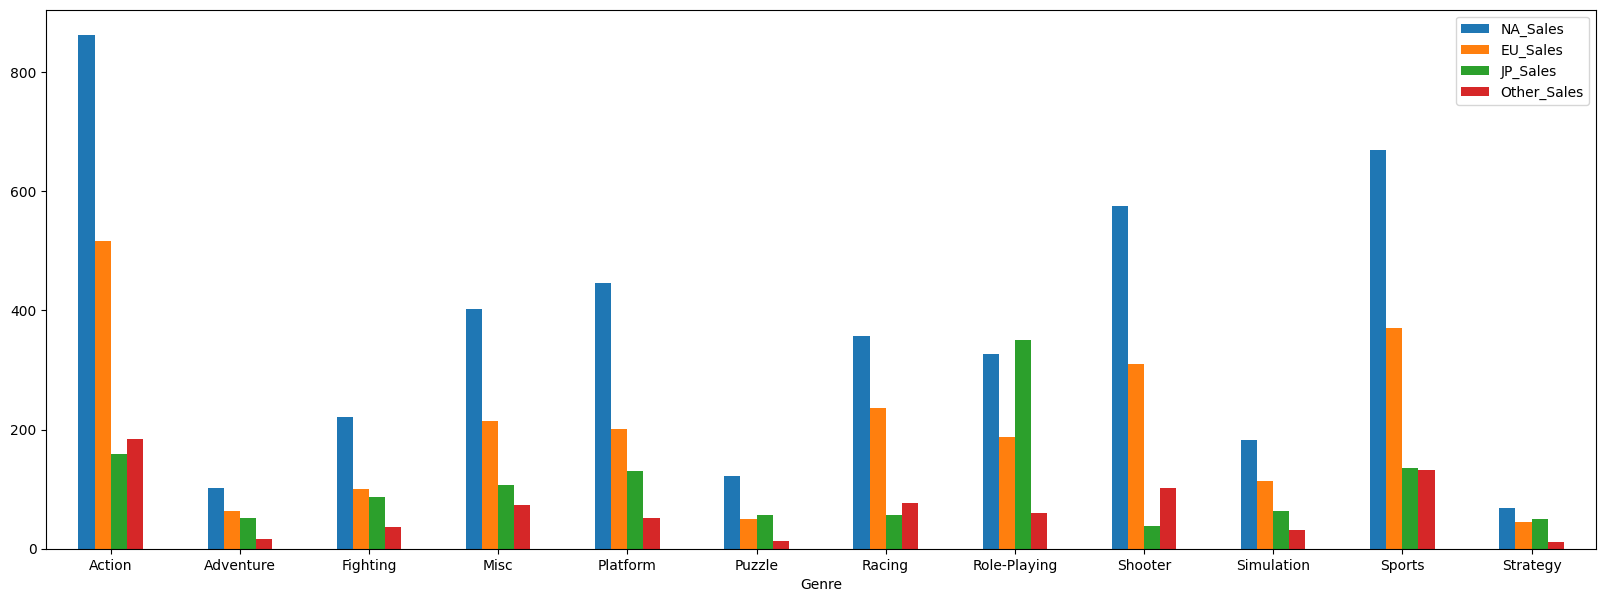

In [100]:
genre_global_sales_region.plot.bar(x="Genre", rot=0, figsize=(20, 7))